In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

In [3]:
df = pd.read_table("data/D2z.txt", sep=" ", header=None, names=['X1', 'X2', 'Y'])
df.head()

,X1,X2,Y
0,-0.333338,-0.087171,0
1,-1.531730,0.358194,1
2,1.549590,-0.364050,0
3,-1.349910,0.252063,1
4,1.283850,-0.531146,0


In [10]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
print(X.shape, y.shape)

(200, 2) (200,)


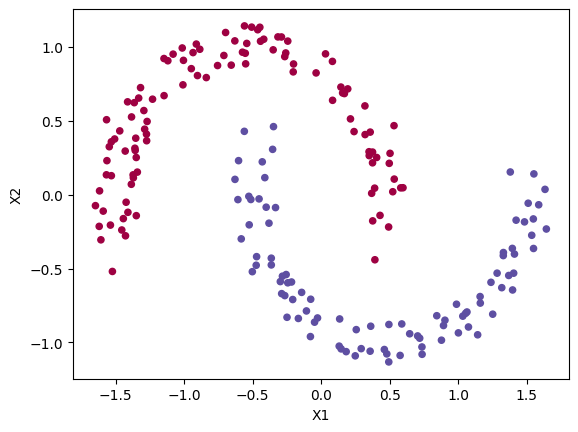

In [34]:
df.plot.scatter(x='X1',y='X2', c='Y', cmap='Spectral_r', colorbar=False)
plt.show()

In [79]:
n = 41
x1 = np.linspace(-2, 2, n)
x2 = np.linspace(-2, 2, n)

x = np.array(np.meshgrid(x1,x2)).reshape(2,-1)
x = pd.DataFrame(x.T)
x.columns = ["X1","X2"]
decision_space = distance_matrix(x,X)
decision_space = np.argmin(decision_space, axis=1)
decision_space = y.iloc[decision_space].to_numpy()

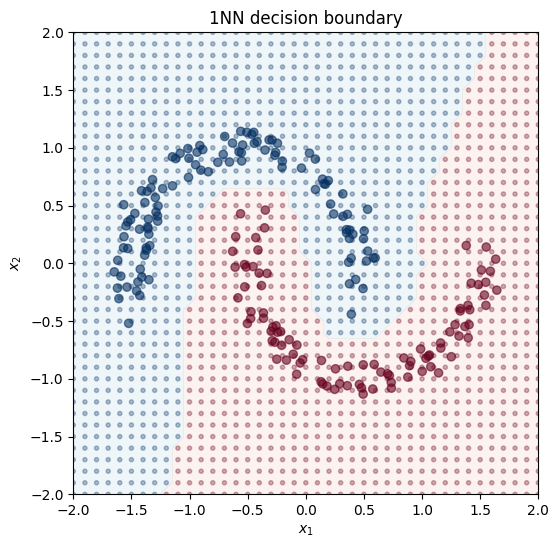

In [84]:

fig = plt.figure(num=None, figsize=(6, 6))
plt.contourf(x1, x2, decision_space.reshape(41,41), alpha=0.1, cmap='RdBu', levels=1)
plt.scatter(x=x['X1'], y=x['X2'], c=decision_space, cmap='RdBu', marker='.', alpha=0.3)
plt.scatter(x=df['X1'], y=df['X2'], c=df['Y'], cmap='RdBu', alpha=0.6)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("1NN decision boundary")
plt.show()